

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 **Tip**: This dataset collects information from 100k medical appointments in Brazil 
 we will try to find some figures and analyzes that have a reason for the patient not attending the his appointment 
 
## Columns description

<ul>
    <li><b>PatientId:</b> Id for each patient.</li>
    <li><b>AppointmentID:</b> Id for appointment.</li>
    <li><b>Gender:</b> Male or Female.</li>
    <li><b>ScheduledDay:</b> The day the appointment was registered.</li>
    <li><b>AppointmentDay:</b> Appointment day.</li>
    <li><b>Age:</b> Patient age.</li>
    <li><b>Scholarship:</b> Have Scholarship or not </li>
    <li><b>Neighbourhood:</b> Aappointment place. </li>
    <li><b>Hipertension:</b> Patient suffers from high blood pressure  or not.</li>
    <li><b>Diabetes:</b> Patient suffers from diabetes (blood suger) or not.</li>
    <li><b>Alcoholism:</b> Patient is addicted to alcohol or not.</li>
    <li><b>Handcap:</b>  Patient has a physical or mental disability that prevents them living a totally normal life.</li>
    <li><b>SMS_received:</b> Patient received message or no.</li>
    <li><b>No-show:</b> Patient attended the appointment or no.</li>
  

</ul>

## Questions
<ul>
  <li>What is the total percentage of No show cases?</li>
  <li>What is the gender has more no show cases?</li>
  <li>Are the same appointment and scheduled day affected on no show cases?</li>  
  <li>What is the percentage of no show for each neighbourhood?and the most five neighbourhood have no show cases?</li> 
  <li>What is the relation between receiving sms and no show?</li> 
    </ul>



In [1]:
#Important packages has been imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### 1-Gatrgering data
Load your data from (noshowappointments.csv) file and  
print out a few lines. Perform operations to inspect data

In [2]:
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 1-Assess data
In the below section we will check some information about the dataframe such as shape,info and describe

In [3]:
# dimiantions of the dataframe
df.shape

(110527, 14)

In [4]:
# this displays a concise summary of the dataframe,and Non-value data
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### 3-Data Cleaning 
In this section we will clean our datafrme
<ul>
 <li>Convert any(-) to (_) in the columns names.</li>
 <li>Change the data type for ScheduledDay and AppointmentDay columns to be datetime. </li>
 <li>Checking the duplicated data.</li> 
 <li>Drop wrong date (Age==-1)</li>
 <li>Drob unused columns such as 'PatientId' and 'AppointmentID'</li>
 <li>Add missed colums to the dataframe using Numpy.</li>
</ul>    

In [6]:
#Convert any(-) to (_) in the columns names
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

In [7]:
#Change the data type for ScheduledDay and AppointmentDay columns to be datetime
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
#checking all info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [8]:
#checking dublicated data
df.duplicated().sum()

0

In [9]:
#Drob data value for -1 age
df.Age.value_counts()
df.drop(df[df.Age==-1].index,inplace=True)


In [10]:
#Drob unused columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#adding a new column , it is name  Missed
df["Missed"] = np.where(df["No_show"] == "Yes",1,0)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Missed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 (What is the total percentage of No show cases?)
In the below section we will check the total percentage of no show cases in the dataframe

In [12]:
#value counts for No show
df.No_show.value_counts()
#total rows that have value("Yes")over the total and near the value to 2 decimal
no_show_percentage= round(df.No_show.value_counts()[1]/sum(df.No_show.value_counts())*100,2)
no_show_percentage


20.19

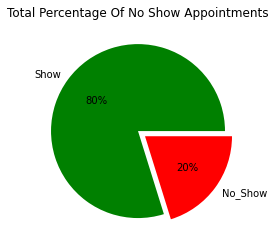

In [13]:
#adding labels and explode the percentage of no show

mylabels = ["Show","No_Show"]
myexplode = [0,0.1]
# add pie chart  to show the percentage and some feature such as labels,explode,colors and autoopect

plt.pie(df.No_show.value_counts(),labels = mylabels, explode = myexplode ,colors=["green","red"],autopct='%1.0f%%')
plt.title("Total Percentage Of No Show Appointments")
plt.show()

The above plot shows the percentage of No_show and Show cases
<li>The total show is 80%</li>
<li> The total no show is 20%</li>

### Question 2 (What is the gender has more no show cases?)
In this section we will check the total no show cases for each gender. we will add 2 dataframes
<li>df_total_noshow for noshow cases</li>
<li>df_total_show for show cases</li>

check the shape for each one



In [14]:
# adding total show and total noshow dataframes
df_total_noshow=df.query('No_show=="Yes"')
df_total_show=df.query('No_show=="No"')
#check the shape for each one
df_total_noshow.shape ,df_total_show.shape


((22319, 13), (88207, 13))

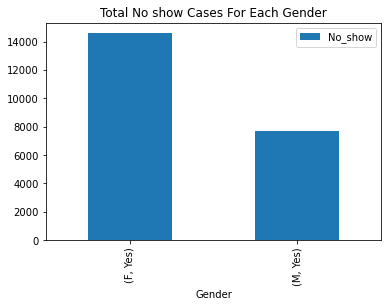

In [15]:
#add plot no show cases groub be the gender
df_total_noshow.groupby('Gender')['No_show'].value_counts().plot(kind='bar')
#add title
plt.title("Total No show Cases For Each Gender")
#set the x lable
plt.xlabel("Gender")
#add legend and show
plt.legend()
plt.show()

The above plot shows total No show cases for each gender



### Question 3 (Are the same appointment and scheduled day affected on no show cases?)

In this section, we will check if the  appointment and the schedule are in the same day  has any effect on the total number of no showcases or not. we will create 2 dataframes
<li>same_day: includes same appointment and the schedule records </li>
<li>not_same_day : includes not same appointment and the schedule records</li>



In [16]:
#we will create 2 dataframes
same_day=df.query('AppointmentDay.dt.day_name()==ScheduledDay.dt.day_name()')
not_same_day=df.query('AppointmentDay.dt.day_name()!=ScheduledDay.dt.day_name()')
#checking if the sum of the both dataframes equal the total df dataframe
len(same_day)+len(not_same_day)==len(df)
#print value counts for each one
same_day.No_show.value_counts(),not_same_day.No_show.value_counts()

(No     46385
 Yes     5867
 Name: No_show, dtype: int64,
 No     41822
 Yes    16452
 Name: No_show, dtype: int64)

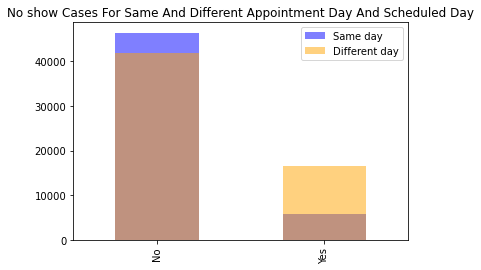

In [17]:
#add plot No_show.value_counts for same day data frame
same_day.No_show.value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Same day')
#add plot No_show.value_counts for not same day data frame
not_same_day.No_show.value_counts().plot(kind='bar',alpha=0.5, color= 'Orange', label='Different day')
#add legend and title
plt.legend()
plt.title("No show Cases For Same And Different Appointment Day And Scheduled Day")
plt.show()

The above plot shows the total number of no show cases if the appointment day at the same scheduled day and st the different scheduled day

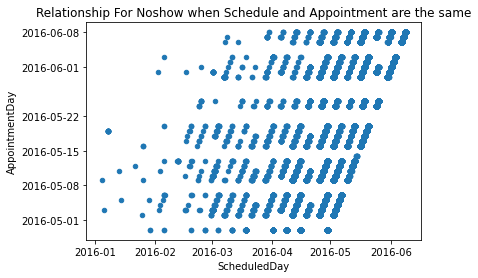

In [18]:
#add scatter plot between "ScheduledDay","AppointmentDay" in same day dataframe
same_day.plot(kind="scatter", x="ScheduledDay",y="AppointmentDay")
#add title
plt.title("Relationship For Noshow when Schedule and Appointment are the same")
plt.show()

The above plot shows the relationship for No show when schedule and appointment are the same.

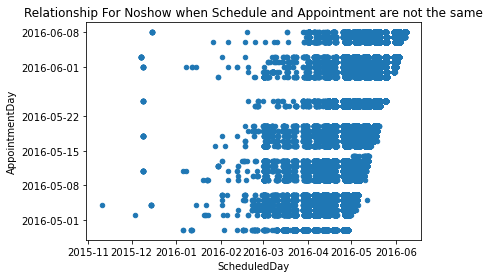

In [19]:
#add scatter plot between "ScheduledDay","AppointmentDay" in not same day dataframe
not_same_day.plot(kind="scatter", x="ScheduledDay",y="AppointmentDay")
#add title
plt.title("Relationship For Noshow when Schedule and Appointment are not the same")
plt.show()

The above plot shows the relationship for No show when schedule and appointment are not the same.

### Question 4( What is the total no show cases per the age?)
In this section we will check the no show and show cases for each age,and the most age has the highest no show cases.W e will add 2 plot using df_total_show and df_total_noshow to can find the most age has now show cases

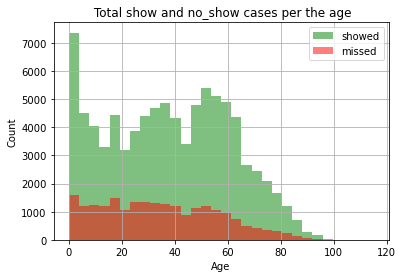

In [20]:
#add 2 hist plot for total show and total no show realted to age
df_total_show.Age.hist(alpha=0.5, bins=30,label="showed",color="green")
df_total_noshow.Age.hist(alpha=0.5, bins=30,label="missed",color="red")
#add legend ,title and labels
plt.legend();
plt.title(" Total show and no_show cases per the age")
plt.xlabel("Age")
plt.ylabel("Count");
plt.show()

 in the above plot shows the no show and show cases for each age,and the most age has the highest no show cases

### Question 4 (What is the percentage of no show for each neighbourhood?and the most five neighbourhood have no show cases?)
in this section we will try to find the percentage of no show for each neighbourhood?and the most five neighbourhood have no show cases

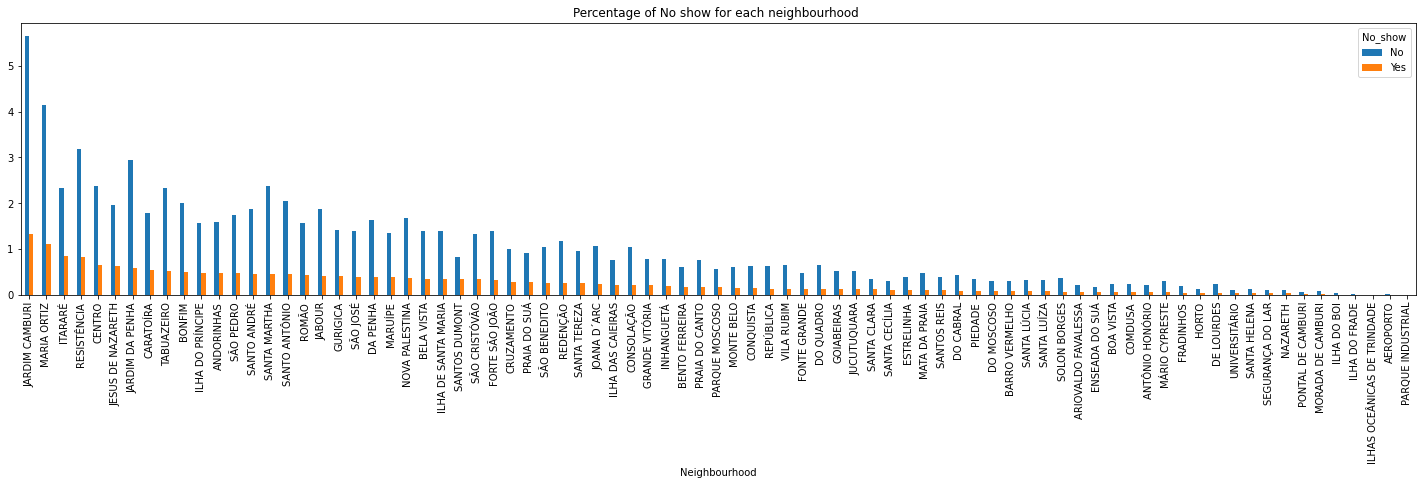

In [21]:
# check counts for no show cases groub by Neighbourhood column
Neighbour_count=df.groupby('Neighbourhood')['No_show'].value_counts()
#add plot for count percentage and round it bt 2 decimal and sort start from higher values

round(Neighbour_count / len(df) * 100,2).unstack().sort_values(by="Yes",ascending=False).plot(kind="bar", figsize=(25,5));
#adding title
plt.title("Percentage of No show for each neighbourhood ");
plt.show()

In the above plot we can see the percentage of no show and show cases for each neighbourhood and the highest one.

In [22]:
#The most five neighbourhood have no show cases are
df_total_noshow.groupby('Neighbourhood')['No_show'].value_counts().sort_values(ascending=False)[0:5]
                                                                               

Neighbourhood   No_show
JARDIM CAMBURI  Yes        1465
MARIA ORTIZ     Yes        1219
ITARARÉ         Yes         923
RESISTÊNCIA     Yes         906
CENTRO          Yes         703
Name: No_show, dtype: int64

### Question 5 (What is the relation between receiving sms and no show?)
In this section, we will find the total percent of no show cases for who received sms and didn't receive

In [23]:
#total coounts for sms in total no show data frame
df_total_noshow.SMS_received.value_counts()

0    12535
1     9784
Name: SMS_received, dtype: int64

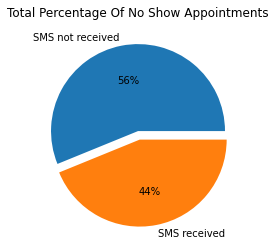

In [24]:
#add  pie plot  shows the percentage for received and didn't receive sms for all no show cases
#and some feature such as labels,explode,colors ,autoopect and title
myexplode2 = [0,0.1]
plt.pie(df_total_noshow.SMS_received.value_counts(),labels = ["SMS not received","SMS received"], explode =myexplode2 ,autopct='%1.0f%%')
plt.title("Total Percentage Of No Show Appointments")
plt.show()

In the above plot we can see the percentage for received and didn't receive sms for all no show cases. Most of no show cases didnt receive a SMS
<li>SMS not received percentage 56%</li>
<li>SMS received percentage 44%</li>

### Conclusion for  all columns for the no show cases

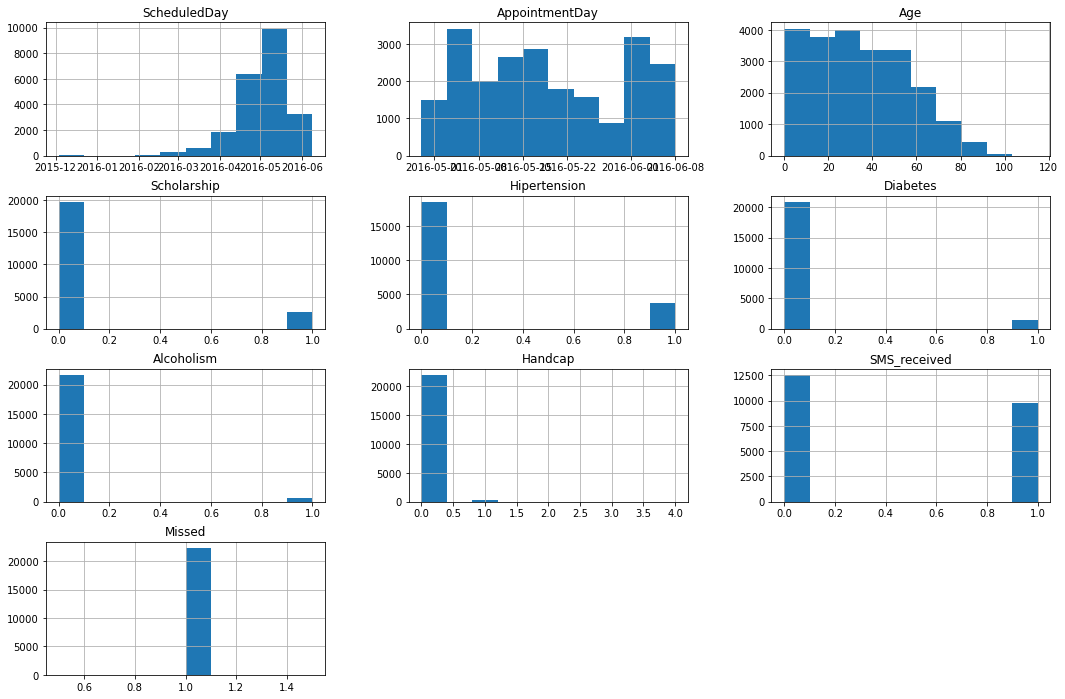

In [25]:
#Conclusion for the other all columns for the no show cases
df_total_noshow.hist(figsize=(18,12))
plt.show()

Conclusion for the other all columns for the no show cases

<a id='conclusions'></a>
## Conclusions



<ul>
    <li>The total percent of the No show cases is 20.19%.</li>
    <li>The percentage on no show cases for the females higher than the males.</li>
    <li>Most of now show cases happened when the appointment day different on the scheduled day.</li>
    <li>Kids with 0 age have the most no show cases.</li>
    <li>The total percent of the No show cases didn't  receive sms is 56%.</li>
    <li>The most five neighbourhood have no show cases are:</li>
        
          1-JARDIM CAMBURI
          2-MARIA ORTIZ 
          3-ITARARÉ
          4-RESISTÊNCIA
          5-CENTRO
             
    
  
</ul>



## limitations


<ul>
<li>The dataset need some extra columns (it is first appointment, if the patient near from the neighbourhood or not).
    </li>
<li>the data set needs to add the neighbourhood doctor name. </li>
<li>The period for this dataset is very short</li>
    <li>Some columns need more explanation like (Scholarship,Hipertension,Diabetes,Alcoholism,Handcap)</li>
    <li> Need more conditional error to avoid entering invalis data like -1 for the age</li>
    
    </ul>

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295